# QPA Analysis

In [1]:
import numpy as np
import pandas as pd
import random
import math

## Task Set Generator

Task set generation was done by modifying the existing UUniFastDiscard Algorithm to generate Task sets in the form of list

**[ executiontime,relative deadline,period ]**

Deadline was upper bounded by *1.2xperiod*


Deadline was lower bounded by {1,2,3,4}xexecution time.




In [2]:
def UUniFastDiscard(n, u, nsets):
    sets = []
    while len(sets) < nsets:
        # Classic UUniFast algorithm:
        utilizations = []
        sumU = u
        for i in range(1, n):
            nextSumU = sumU * random.random() ** (1.0 / (n - i))
            utilizations.append(sumU - nextSumU)
            sumU = nextSumU
        utilizations.append(sumU)

        # If no task utilization exceeds 1:
        if all(ut <= 1 for ut in utilizations):
            sets.append(utilizations)
    print(sets)
#     return sets


In [3]:
def gen_ripoll(nsets, compute, deadline, period, target_util):
    """
    Ripoll et al. tasksets generator.
    Args:
        - `nsets`: Number of tasksets to generate.
        - `compute`: Maximum computation time of a task.
        - `deadline`: Maximum slack time.
        - `period`: Maximum delay after the deadline.
        - `target_util`: Total utilization to reach.
    """
    sets = []
    for i in range(nsets):
        task_set = []
        total_util = 0.0
        while total_util < target_util:
            c = random.randint(1, compute)
            a=0
            if c<10:
                a=c
            elif c<100:
                a=2*c
            elif c<1000:
                a=3*c
            else:
                a=4*c
#             d = c + random.randint(0, deadline)
#             print(a,c)
            p = random.randint(0, period)
            if(math.ceil(1.2*p)<a):
                continue
            d = random.randint(a, math.ceil(1.2*p))
#             p = random.randint(0, period)
            task_set.append([c, d, p])
            total_util += float(c) / p
        sets.append(task_set)
#         print(task_set)
#         print("---")
    return sets


## Implementation : 

## Upper Bound La calculation

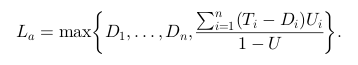

In [4]:
#upperbound L_a
def upper_bound_L_a(task):
    L_a=0;
    for i in range(len(task)):
        L_a=max(L_a,task[i][1])
    value=0
    for i in range(len(task)):
        value+=(task[i][2]-task[i][1])*utilization[i]
    # print(value)
    L_a=max(L_a,value/(1-U))
    return L_a

## Upper Bound Lb calculation

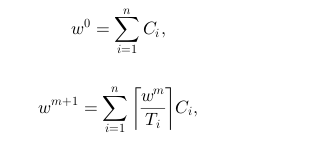

In [5]:
#upper_bound L_b
def upper_bound_L_b(task):
    w_0=0
    for i in range(len(task)):
        w_0+=task[i][0]
    
    # w_1=0
#     print(w_0)
    while w_0:
        val=0
        for i in range(len(task)):
            try:
                x=math.ceil(w_0/task[i][2])*task[i][0]
                val+=x
            except:
                y=math.ceil(w_0//task[i][2])*task[i][0]
                val+=y
#         print(val)
        if(val==w_0):
            return val
        w_0=val
    
    
    

## Processor Demand Function

*Measurement metric*

**Time complexity : O(n)**

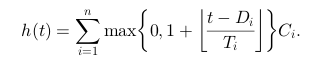

In [6]:
def h_function(task,t):
    result=0
    for i in range(len(task)):
        factor=max(0,1+(math.floor((t-task[i][1])/task[i][2])))*task[i][0]
        result+=factor
    return result

## Function to calculate the absolute deadlines in the range(0,x)

**Time complexity : O(n)**

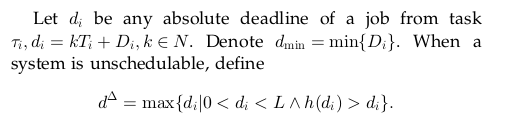

In [7]:
def check_absolute_deadlines(task,x):
    count=set()
#     count.add(0)
    for i in range(len(task)):
        k=0
        while(True):
            d_i=k*task[i][2]+task[i][1]
            if d_i<x and h_function(task,d_i)<=d_i:
#                 print(h_function(task,d_i), d_i)
                k+=1
                count.add(d_i)
#                 print(d_i)
            else:
                break
#         print(count)
#     print(sorted(count))
    return count

## D_delta calculation

In [8]:
def calculate_d_delta(task,deadlines):
    d_delta=0
    for deadline in deadlines:
        if h_function(task,deadline)>deadline:
            d_delta=max(d_delta,deadline)
    return d_delta
    

# Proposed QPA Algorithm

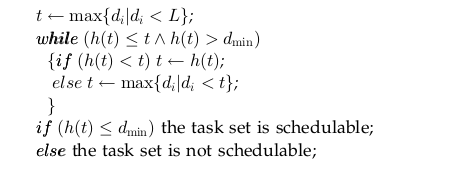

In [9]:
def qpa(task,starting_value,absolute_deadline,d_min):
    t=starting_value
    count=0
    while h_function(task,t)<t and h_function(task,t)>d_min:
        if h_function(task,t)<t:
            t=h_function(task,t)
        else:
            t=0
            for ad in absolute_deadline:
                if ad<t:
                    t=max(ad,t)
        count+=1
    if(h_function(task,t)<d_min):
        print("Schedulable")
        return count+1
    else:
        print("Not schedulable")
        return -1

Default code focuses on the task-set given as example in the paper.


Replace tasks1 with tasks to generate new task-sets and check.

In [13]:
existing_analysis_count_list=[]
qpa_count_list=[]
if __name__=="__main__":
    tasks=gen_ripoll(30,900,1500,2000,0.95)
    tasks2=[[[6000,18000,31000],[2000,9000,9800],[1000,12000,17000],
     [90,3000,4200],[8,78,96],[2,16,12],[10,120,280]
     ,[26,160,660]]]
#           [[5338, 22918, 19155], [4526, 18886, 15955], [2195, 14462, 15352], [4513, 20197, 20832]]]
    tasks1=[[[0.046017,1.419897,1.324642],
            [0.103668,1.819094,1.665016],
            [0.005133,0.341237,2.894035],
            [0.867954,17.024084,14.970213],
            [0.138762,37.186903,47.98906],
            [4.374349,42.335452,90.746475],
            [21.725475,287.330462,372.991594],
            [18.601216,673.81609,847.449375],
            [164.298311,1874.27352,1762.311388],
            [624.972457,5915.216558,5787.904261],
            [1641.81716,7625.959698,15549.16986],
            [1129.07592,4560.327895,46697.68032],
            [13712.6729,92575.63579,80125.00202],
            [12241.42,379004.064,439136.1428],
            [24268.6361,781900.4736,715880.6276],
            [48061.4305,939573.2658,1000000]
            
           ]]
    for task in tasks2:
        U=0;
        utilization=[]
        for i in range(len(task)):
            utilization.append(task[i][0]/task[i][2])
        U+=task[i][0]/task[i][2]
        if(U>1):
            print("Not schedulable")
            continue
        L_a=upper_bound_L_a(task)
        L_b=upper_bound_L_b(task)
        print("L_a : ",L_a)
        print("L_b: ",L_b)
        if(L_b is None):
            L_b=L_a
        deadlines=check_absolute_deadlines(task,L_a)
        existing_analysis_count=len(deadlines)
        deadlines=check_absolute_deadlines(task,L_b)
        existing_analysis_count=min(existing_analysis_count,len(deadlines))
        L=0
        if U==1:
            L=L_b
        else:
            L=min(L_a,L_b)
        d_min=task[0][1]
        
        for i in range(len(task)):
            d_min=min(d_min,task[i][1])
        absolute_deadlines=check_absolute_deadlines(task,L)
        d_delta=calculate_d_delta(task,absolute_deadlines)
        starting_value=0
        for i in range(len(task)):
            k=0
            while(True):
                d_i=k*task[i][2]+task[i][1]
                if d_i>=L:
                    break
                starting_value=max(starting_value,d_i)
                k+=1
        qpa_count=qpa(task,starting_value,absolute_deadlines,d_min)
        print("QPA Analysis count: ",qpa_count)
        print("Previous Analysis Count:",existing_analysis_count)
        qpa_count_list.append(qpa_count)
        existing_analysis_count_list.append(existing_analysis_count)
    

L_a :  18000
L_b:  16984
Schedulable
QPA Analysis count:  7
Previous Analysis Count: 1638


In [182]:
X=[]
Y1=[]
Y2=[]

In [210]:
x=[]
y1=[]
y2=[]

In [217]:
y1.append(math.floor(sum(qpa_count_list)/len(qpa_count_list)))
y2.append(math.floor(sum(existing_analysis_count_list)/len(existing_analysis_count_list)))
x.append(0.95)

In [203]:
Y1.append(math.floor(sum(qpa_count_list)/len(qpa_count_list)))
Y2.append(math.floor(sum(existing_analysis_count_list)/len(existing_analysis_count_list)))
X.append(50)

In [204]:
X

[10, 20, 30, 40, 50]

In [205]:
Y1

[3, 3, 3, 2, 2]

In [206]:
Y2

[11, 10, 12, 9, 10]

## Result Analysis

### No. of tasks vs No. of H(t) Calculations

In this experiment, we let each task set’s utilization be 0.95.
The number of the required calculation times is therefore a function of
the number of tasks. Results of this experiment are
illustrated below

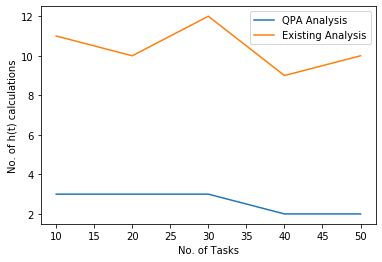

In [208]:
import matplotlib.pyplot as plt 
plt.plot(X, Y1, label = "QPA Analysis")
plt.plot(X, Y2, label = "Existing Analysis")
plt.xlabel('No. of Tasks') 
plt.ylabel('No. of h(t) calculations')
plt.legend()
plt.show()

### Utilization of taskset vs No. of H(t) calculations 

The size of each task set is 30 and the results of this experiment are illustrated below :

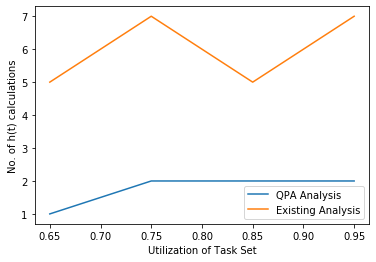

In [218]:
plt.plot(x, y1, label = "QPA Analysis")
plt.plot(x, y2, label = "Existing Analysis")
plt.xlabel('Utilization of Task Set') 
plt.ylabel('No. of h(t) calculations')
plt.legend()
plt.show()